### Import Libares

In [5]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


### Read The Data

In [4]:
df = pd.read_csv("heart_NEW.csv")

df.sample(20)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
203,31,F,ATA,100,219,0,ST,150,N,0.0,Up,0
857,53,F,ASY,130,264,0,LVH,143,N,0.4,Flat,0
256,55,F,ATA,130,394,0,LVH,150,N,0.0,Up,0
703,41,F,ATA,126,306,0,Normal,163,N,0.0,Up,0
206,35,M,ATA,120,308,0,LVH,180,N,0.0,Up,0
594,58,M,ASY,160,256,1,LVH,113,Y,1.0,Up,1
670,41,F,ATA,105,198,0,Normal,168,N,0.0,Up,0
442,51,M,ASY,128,0,1,ST,125,Y,1.2,Flat,1
697,58,M,ASY,150,270,0,LVH,111,Y,0.8,Up,1
122,46,M,ASY,110,240,0,ST,140,N,0.0,Up,0


### Visualization The Data to Provide Information

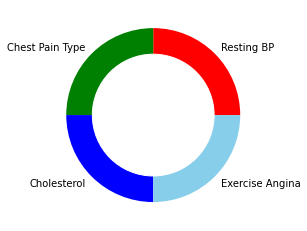

In [6]:

names = ['Resting BP', 'Chest Pain Type', 'Cholesterol', 'Exercise Angina']
size = [20,20,20,20]
 
my_circle = plt.Circle( (0,0), 0.7, color='white')

plt.pie(size, labels=names, colors=['red','green','blue','skyblue'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.savefig('All.png',dpi=150)
plt.show()

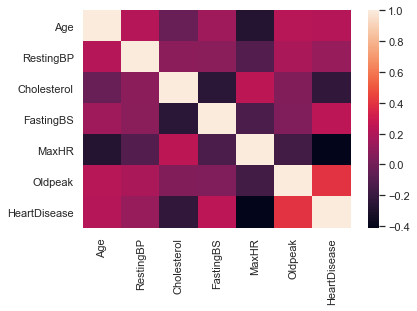

In [313]:
sns.heatmap(df.corr());


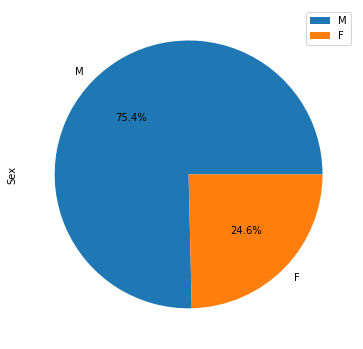

In [7]:
type_counts = df['Sex'].value_counts()
df1 = pd.DataFrame({'Sex': type_counts})
df1.plot.pie(y='Sex', figsize=(6,20), autopct='%1.1f%%')
plt.yticks(rotation=90)
plt.savefig('Sex.png',dpi=150)

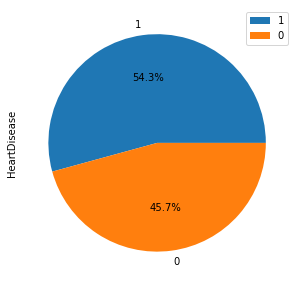

In [8]:
type_counts = df['HeartDisease'].value_counts()
df1 = pd.DataFrame({'HeartDisease': type_counts})
df1.plot.pie(y='HeartDisease', figsize=(5,5), autopct='%1.1f%%');

Age - HeartDisease



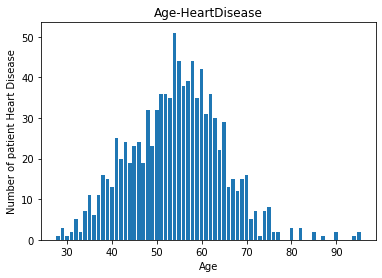

In [9]:
#Age - HeartDisease
print('Age - HeartDisease')
Age_df = pd.DataFrame(df['HeartDisease'].groupby(df['Age']).count())
plt.title('Age-HeartDisease')
plt.bar(Age_df.index, Age_df['HeartDisease'])
plt.xlabel('Age')
plt.ylabel('Number of patient Heart Disease')
#plt.show()
plt.savefig('Age-HeartDisease.png',dpi=150)
print()

### Cholesterol

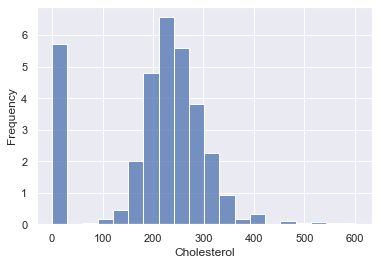

In [314]:
sns.histplot(df['Cholesterol'], kde=False,bins=20, stat='frequency');
plt.savefig('ch.png',dpi=150)

In [316]:
df['Cholesterol'].describe()

count    999.000000
mean     203.497497
std      106.915273
min        0.000000
25%      179.500000
50%      225.000000
75%      269.000000
max      603.000000
Name: Cholesterol, dtype: float64

In [317]:
df.Cholesterol.mean()

203.4974974974975

In [318]:
 df['Cholesterol'] = df['Cholesterol'].replace(0, 203.4974974974975)

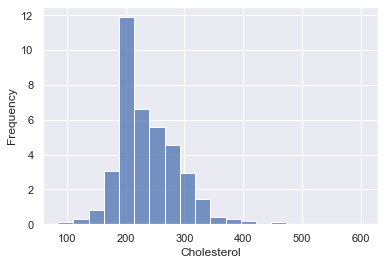

In [319]:
sns.histplot(df['Cholesterol'], kde=False,bins=20, stat='frequency');
plt.savefig('chnew.png',dpi=150)

###  Add New Column Which Is Cholesterol_type

In [320]:
conditions = [
    (df['Cholesterol'] >= 0) & (df['Cholesterol']<= 99),
    (df['Cholesterol'] >= 100) & (df['Cholesterol']<= 129),
    (df['Cholesterol'] >= 130) & (df['Cholesterol'] <= 159),
    (df['Cholesterol'] >= 160 ) & (df['Cholesterol'] <= 189),
    (df['Cholesterol'] >= 190 ) & (df['Cholesterol'] <= 650),
    ]

values = ['under normal','normal', 'above normal', 'high', 'very high']

df['Cholesterol_type'] = np.select(conditions, values)

In [321]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Cholesterol_type
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0,very high
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1,high
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0,very high
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1,very high
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0,very high


In [322]:
df.describe(include="all")

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Cholesterol_type
count,999.000000,999,999,999.000000,999.000000,999.000000,999,999.000000,999,999.000000,999,999.000000,999
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN,5
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN,very high
freq,NaN,753,526,NaN,NaN,NaN,591,NaN,604,NaN,496,NaN,886
mean,54.402402,NaN,NaN,132.408408,238.534104,0.225225,NaN,138.104104,NaN,0.910711,NaN,0.542543,NaN
std,10.277816,NaN,NaN,17.866051,55.363127,0.417940,NaN,25.474911,NaN,1.076659,NaN,0.498436,NaN
min,28.000000,NaN,NaN,80.000000,85.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000,NaN
25%,48.000000,NaN,NaN,120.000000,203.497497,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000,NaN
50%,55.000000,NaN,NaN,130.000000,225.000000,0.000000,NaN,140.000000,NaN,0.600000,NaN,1.000000,NaN
75%,61.000000,NaN,NaN,140.000000,269.000000,0.000000,NaN,158.000000,NaN,1.500000,NaN,1.000000,NaN


### Mask Function

#### mask_ChestPainType_HeartDisease

In [323]:
mask_ChestPainType_HeartDisease = (df.ChestPainType == 'ATA') & (df.HeartDisease == 1) 

df[mask_ChestPainType_HeartDisease].shape[0]

37

In [324]:
mask_ChestPainType_HeartDisease = (df.ChestPainType == 'NAP') & (df.HeartDisease == 1) 

df[mask_ChestPainType_HeartDisease].shape[0]

79

In [325]:
mask_ChestPainType_HeartDisease = (df.ChestPainType == 'ASY') & (df.HeartDisease == 1) 

df[mask_ChestPainType_HeartDisease].shape[0]

405

In [326]:
mask_ChestPainType_HeartDisease = (df.ChestPainType == 'TA') & (df.HeartDisease == 1) 

df[mask_ChestPainType_HeartDisease].shape[0]

21

#### mask_Cholesterol_HeartDisease

In [327]:
mask_Cholesterol_HeartDisease = (df.Cholesterol >= 190) & (df.HeartDisease >= 1) 

df[mask_Cholesterol_HeartDisease].shape[0]

492

#### mask_ExerciseAngina_HeartDisease

In [328]:
mask_ExerciseAngina_HeartDisease = (df.ExerciseAngina == 'Y') & (df.HeartDisease >= 1) 

df[mask_ExerciseAngina_HeartDisease].shape[0]


337

#### mask_Sex_HeartDisease

In [329]:
mask_Sex_HeartDisease = (df.Sex == 'M') & (df.HeartDisease == 1) 

df[mask_Sex_HeartDisease].shape[0]

469

#### mask_Age_HeartDisease

In [330]:
mask_Age_HeartDisease = (df.Age >= 54) & (df.HeartDisease >= 1) 

df[mask_Age_HeartDisease].shape[0]


363

#### mask_RestingBP_HeartDisease

In [331]:
mask_RestingBP_HeartDisease = (df.RestingBP >= 140) & (df.HeartDisease >= 1) 

df[mask_Cholesterol_HeartDisease].shape[0]

492

### Histogram For Cholesterol_type

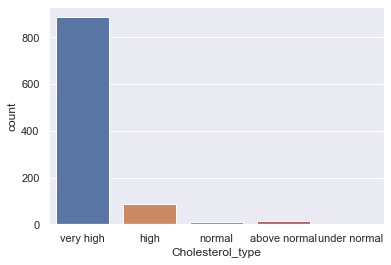

In [337]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x=df["Cholesterol_type"])